In [ ]:
# Last Updated: June 5, 2023

# **Logistic Regression from Scratch**

Logistic regression is a statistical modeling technique used for binary classification problems, where the goal is to predict the probability that an observation belongs to one of two possible outcomes or classes. It is a supervised learning algorithm that learns the relationship between input features and the corresponding binary labels.

The main idea behind logistic regression is to model the relationship between the features and the probability of belonging to a particular class using a logistic (or sigmoid) function. The logistic function takes any real-valued input and maps it to a value between 0 and 1.

In logistic regression, the input features are combined linearly using weights (coefficients). This linear combination is then passed passed through the sigmoid or logistic function to obtain predicted probabilities.



- **Sigmoid Function**

The sigmoid function, denoted as $g(z)$, is defined as:

$$g(z) = \frac{1}{1+e^{-z}}$$ 

Now, let's plot the sigmoid function.

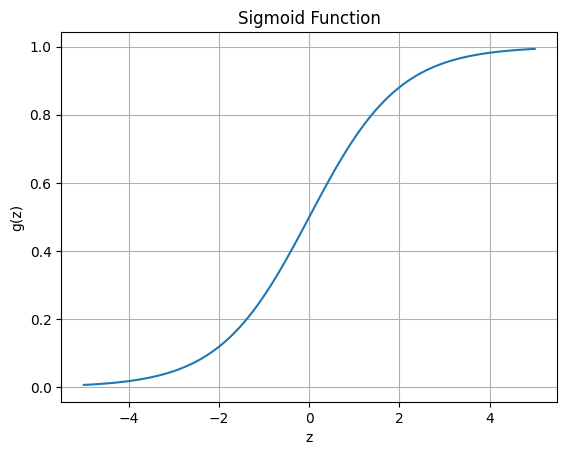

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid function
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

# Create a range of values for z
z = np.linspace(-5, 5, 100)

# Calculate the corresponding values of g(z)
g = sigmoid(z)

# Plot the function
plt.plot(z, g)
plt.xlabel("z")
plt.ylabel("g(z)")
plt.title("Sigmoid Function")
plt.grid(True)
plt.show()

The sigmoid plot shows an S-shaped curve, indicating that as the input decreases, the sigmoid tends to 0, and as the input increases, the sigmoid tends to 1. This demonstrates how the sigmoid function maps inputs to probabilities between 0 and 1.

- **Probability**

In logistic regression, the probability of an observation belonging to the positive class ($y=1$) is represented by:

$$P(y=1 \mid x,\theta) = g(x,\theta)$$

$$g(x,\theta)= \frac{1}{1+e^{-x\theta}}$$


Here, $x\theta$ represents the linear combination of the input features ($x$) and their corresponding weights ($\theta$).
$$x\theta = x_0 \theta_0 + x_1 \theta_1 + ... + x_D \theta_D$$

The sigmoid function maps the linear combination to a probability between 0 and 1, allowing us to interpret the output as the likelihood of belonging to the positive class.

By the principle of complementary probabilities, the probability of an observation belonging to the negative class ($y=0$) can be calculated as:

\begin{equation}
P(y=0 \mid x,\theta) = 1 - g(x,\theta)
\end{equation}



- **Likelihood**

In logistic regression, our goal is to minimize the classification error by finding the optimal parameters $\theta$. To measure our correctness, we compute the likelihood of being correct as:

$$l(y\mid x, \theta) = (g(x,\theta))^y (1-g(x,\theta))^{(1-y)}$$

Considering the conditional independence of observations, the likelihood for the entire dataset can be expressed as:

$$
l(Y\mid X, \theta) = \prod\limits_{t=1}^{N} l(Y_t\mid X_t, \theta)
$$

Which further simplifies to:

$$
l(Y\mid X, \theta) = \prod\limits_{t=1}^{N} g(X_t,\theta)^{Y_t}(1-g(X_t,\theta))^{(1-Y_t)}
$$

Maximizing this likelihood helps us find the optimal parameters that maximize the correctness of our classification.

- **Log likelihood**

To maximize the likelihood, we need to take the derivative. However, differentiating a product of multiple terms can be complex and time-consuming. To simplify this process, we take the natural logarithm (log) of the likelihood. By applying the log function, we convert the product into a sum, making it easier to differentiate. Thus, we want to maximize the log likelihood.

Taking the log of the likelihood for a single observation, we have:

$$l(y\mid x, \theta) = ln(g(x,\theta)^y (1-g(x,\theta))^{(1-y)})$$

Utilizing the properties of logarithm, we can simplify this expression as follows:

$$l(y\mid x, \theta) = ln(g(x,\theta)^y) +  ln((1-g(x,\theta))^{(1-y)})$$

$$l(y\mid x, \theta) = y.ln(g(x,\theta)) +  (1-y).ln(1-g(x,\theta))$$

Since we are taking the log of the product for each instance, we obtain a sum:

$$
l(Y\mid X, \theta) = \sum_{i=1}^{N} Y_t\ln(g(X_t,\theta)) + (1-Y_t)\ln(1-(g(X_t,\theta))
$$

Maximizing the log likelihood allows us to optimize the model parameters $\theta$.

- **Log likelihood derivation**

To maximize the log likelihood, our desired approach is to take the derivative with respect to $\theta$, set it to zero, and solve for $\theta$ to find the maximum value. However, in practice, finding a closed-loop solution is not always possible. Therefore, we employ the gradient ascent algorithm, which is used for maximizing functions.

We start by considering a single observation and a single parameter. Once we have established this process, we will proceed to vectorize it to handle all parameters and observations.

The log likelihood for a single observation is defined as:

$$l(y\mid x, \theta) = y.ln(g(x,\theta)) + (1-y).ln(1-g(x,\theta))$$

The derivative of the log likelihood function with respect to a single parameter $\theta_j$:

$$
\frac{\partial}{\partial \theta_j} l(y\mid x, \theta) 
= \frac{\partial}{\partial \theta_j}(y.ln(g(x,\theta)) 
+ (1-y).ln(1-g(x,\theta)))
$$

$$
\frac{\partial}{\partial \theta_j} l(y\mid x, \theta) 
=x_j (y - g(x,\theta)) 
$$

To see the steps in deta, you can check [this document](https://github.com/sfc38/Machine_Learning_Algorithms/blob/main/2_Logistic_Regression/Log_Likelihood_Derivation.ipynb).


This derivation can be generalized for all parameters:

$$
\frac{\partial}{\partial \theta} l(y\mid x, \theta) = 
\begin{bmatrix}
\frac{\partial}{\partial \theta_0} l(y\mid x, \theta) \\
\frac{\partial}{\partial \theta_1} l(y\mid x, \theta) \\
\vdots \\
\frac{\partial}{\partial \theta_N} l(y\mid x, \theta)
\end{bmatrix}
=
\begin{bmatrix}
x_0 \\
x_1 \\
\vdots \\
x_N
\end{bmatrix}.
\begin{bmatrix}
y - g(x,\theta) \\
y - g(x,\theta) \\
\vdots \\
y - g(x,\theta)
\end{bmatrix}
$$

By vectorizing this equation for all parameters, we obtain:

$$\frac{\partial l}{\partial \theta} = x^T (y - g(x,\theta)) $$

Further vectorizing it to represent the mean gradient over all observations, we have:

$$\frac{\partial l}{\partial \theta} = \frac{1}{N} X^T (Y - g(X,\theta)) $$




During the training process, logistic regression aims to find the optimal values for the weights and intercept that best fit the training data. This is typically done by maximizing the likelihood of observing the actual labels given the input features. The process involves iterative optimization algorithms such as gradient descent or Newton's method.

To make predictions, a threshold is applied to the predicted probabilities. If the predicted probability is above the threshold, the observation is classified as the positive class; otherwise, it is classified as the negative class. The threshold value can be adjusted to control the trade-off between precision and recall.

Logistic regression is widely used in various fields, including healthcare, finance, marketing, and social sciences. Its advantages include interpretability, simplicity, and efficiency, especially when dealing with large datasets.

While logistic regression is primarily used for binary classification, it can also be extended to handle multi-class problems through techniques like one-vs-rest or multinomial logistic regression. These extensions allow logistic regression to be applied to a wider range of classification tasks.
